In [3]:
# %load retrieve_sentences.py
import pandas as pd
from link_scraper import get_10qs, query_api
from html_to_text import *
import re
import random
import nltk
from nltk.collocations import *

random.seed(15)  # set rng seed for reproducibility
# nltk.download('punkt')#NEED TO download sentence parser (if not already done)


#Select random 10-q from list of all
all_urls = open('links.txt').read().splitlines()
num_urls = len(all_urls)
rand_url = random.randint(0, num_urls - 1)
url = all_urls[rand_url]

#Retrieve document
document = html_to_text(url)

#An example of retrieving sentences
sentences = nltk.sent_tokenize(document)
print(len(sentences))
num_good_sents = 0
good_sents = []
def check_for_formatting(string):
    #Ignore sentences with annoying syntax
    #TODO: figure out how to remove backslash and maybe also remove tabs?
    regex = re.compile('[☒_☐@#^&*()<>?/\|}{~:]|\s\s')
    if(regex.search(string) == None):
        return True

for sentence in sentences:
    if check_for_formatting(sentence):
        num_good_sents = num_good_sents+1
        good_sents.append(sentence)
        # print(sentence)

print("Total acceptable sentences =",num_good_sents)
#Converting the sentences to a document
good_doc = " ".join(good_sents)

# DOESN'T work yet
# # Taken from https://stackoverflow.com/questions/2452982/how-to-extract-common-significant-phrases-from-a-series-of-text-entries
# bigram_measures = nltk.collocations.BigramAssocMeasures()
# trigram_measures = nltk.collocations.TrigramAssocMeasures()
# finder = TrigramCollocationFinder.from_words(good_doc)
# finder.apply_freq_filter(3)
# print('Best Trigrams')
# print(finder.nbest(trigram_measures.pmi, 10))
# ## For looking at sentences
# # for counter in range(5):
# #     print(sentences[3+counter])

[nltk_data] Downloading package punkt to /Users/kunal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


526
Total acceptable sentences = 416


In [6]:
print(type(good_sents))



<class 'list'>


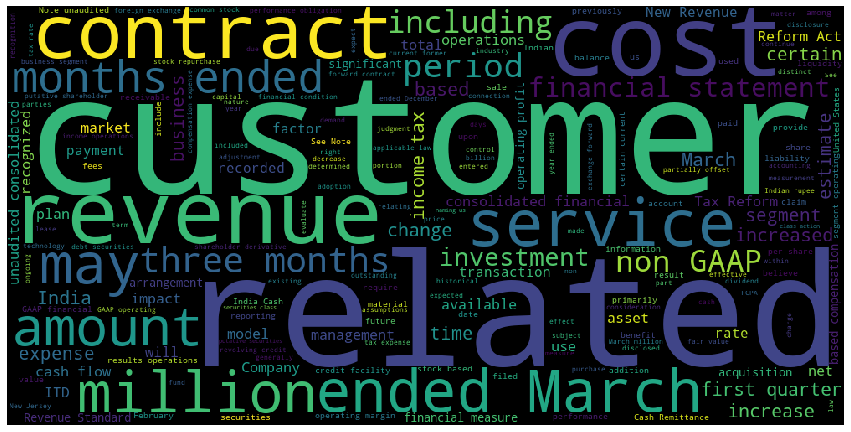

In [10]:
'''
Determining frequent and important phrases below here, non-final code
'''
# Use WordCloud to visualize the most used words in this doc 
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
unique_string=(" ").join(good_sents)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [13]:
good_sents

['See the definitions of “large accelerated filer,” “accelerated filer”, “smaller reporting company,” and "emerging growth company" in Rule\xa012b-2 of the Exchange Act.',
 'FINANCIAL INFORMATION\xa0Item\xa01.',
 'We have prepared the accompanying unaudited consolidated financial statements included herein in accordance with generally accepted accounting principles in the United States of America, or U.S. GAAP, and Regulation S-X under the Securities Exchange Act of 1934, as amended, or the Exchange Act.',
 'In our opinion, all adjustments considered necessary for a fair statement of the accompanying unaudited consolidated financial statements have been included and all adjustments are of a normal and recurring nature.',
 'Operating results for the interim periods are not necessarily indicative of results that may be expected to occur for the entire year.Recently Adopted Accounting PronouncementsDate Issued and TopicDate Adopted and MethodDescriptionImpactMay 2014RevenueJanuary 1, 2018

In [16]:
document = html_to_text(url)
sentences = nltk.sent_tokenize(document)
(sentences)

['\n10-Q\n1\nctsh2018331-10q.htm\n10-Q\n\n\n\n\n\n\nDocument\n\n\nTable of Contents\xa0\xa0\xa0UNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549\xa0\xa0\xa0FORM 10-Q\xa0\xa0\xa0☒Quarterly Report pursuant to Section\xa013 or 15(d) of the Securities Exchange Act of 1934\xa0For the quarterly period ended March 31, 2018☐Transition Report pursuant to Section\xa013 or 15(d) of the Securities Exchange Act of 1934\xa0For the transition period from \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 to \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Commission File Number 0-24429\xa0\xa0\xa0\xa0COGNIZANT TECHNOLOGY SOLUTIONS CORPORATION(Exact Name of Registrant as Specified in Its Charter)\xa0\xa0\xa0Delaware\xa013-3728359(State or Other Jurisdiction ofIncorporation or Organization)\xa0(I.R.S.',
 'EmployerIdentification No.)',
 'Glenpointe Centre West500 Frank W. Burr Blvd.Teaneck, New Jersey\xa007666(Address of Pr

In [17]:
#
all_urls = open('links.txt').read().splitlines()
num_urls = len(all_urls)
rand_url = random.randint(0, num_urls - 1)
url = all_urls[rand_url]

#Retrieve document
document = html_to_text(url)

#An example of retrieving sentences
sentences = nltk.sent_tokenize(document)

AttributeError: 'list' object has no attribute 'word_count'